In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
data=pd.read_csv("/Users/manirathinams/Documents/KT/chennaiHousingprice/Chennai houseing sale.csv")

In [3]:
data.shape

(7109, 22)

In [4]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [7]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Replacing the Null Values of QS_OVERALL with mean values of the data using Simple Imputer

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
data['QS_OVERALL']=imputer.fit_transform(data[['QS_OVERALL']])

Based on the housing knowledge I have, the number of bedrooms are usually related with the number of rooms, and the area. Also since we have a number of bathroom feaure, I will use that too!!

Text(0.5, 1.0, 'Correlation with Number of Bedrooms')

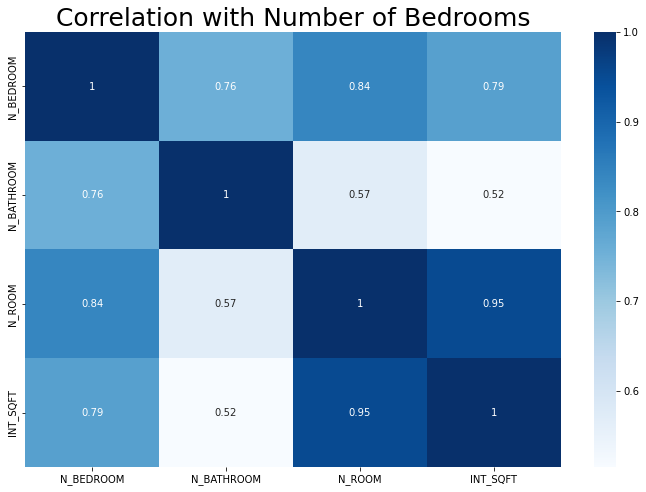

In [9]:
data_bed=data[['N_BEDROOM','N_BATHROOM','N_ROOM','INT_SQFT']]
plt.figure(figsize=(12,8));
sns.heatmap(data_bed.corr(), annot=True, cmap='Blues');
plt.title('Correlation with Number of Bedrooms',fontsize=25,fontweight=5)

We can see that Number of Bedrooms is highly correlated to Number of Rooms and Number of Bathrooms.

In [10]:
data[(data['N_ROOM']==4)& (data['N_BATHROOM']==1) &(data['INT_SQFT']==1556)]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
286,P06391,Velachery,1556,29-08-2009,105,2.0,1.0,4,Partial,No,...,NoSeWa,Paved,RL,4.6,2.4,4.4,3.550,289791,130873,9348100
1462,P00450,T Nagar,1556,05-04-2014,188,1.0,1.0,4,Normal Sale,Yes,...,NoSeWa,No Access,RM,5.0,4.5,2.6,3.795,415316,232088,12215170
4060,P01066,Anna Nagar,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790
5820,P00140,Anna Nagar,1556,13-11-2014,120,1.0,1.0,4,AbNormal,No,...,AllPub,No Access,RM,4.2,2.8,4.6,4.010,731464,292586,18286600


I am filling the empty cell with 1.0 as the their is another house with the exact same 
AREA,INT_SQRT,N_BATHROOMS,N_ROOM.

In [11]:
data.loc[4060,'N_BEDROOM'] = 1.0
data['N_BEDROOM'].isnull().sum()

0

In [12]:
data[data['N_BATHROOM'].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.160000,451857,85486,12212350
5087,P01333,Chrompet,1016,02-08-2012,105,1.0,NaN,3,AbNormal,Yes,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.240000,330086,106479,10647920
6134,P01332,Chormpet,916,02-08-2012,173,1.0,NaN,3,Normal Sale,Yes,...,ELO,Paved,RL,3.4,3.5,3.0,3.503254,265423,44237,8847420
6371,P01189,Chrompet,1035,06-11-2012,90,1.0,NaN,3,Partial,No,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.050000,223403,24823,8274200
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.960000,575606,124455,15556920


Filtering based on AREA and N_ROOMS.

In [13]:
data[(data['N_ROOM']==3) & (data['AREA']=='Chrompet')]['N_BATHROOM'].value_counts() 

1.0    1128
Name: N_BATHROOM, dtype: int64

So all of the houses in Chrompet AREA and N_ROOM = 3 have single bathrooms.

In [14]:
data.loc[[5087,6134,6371],'N_BATHROOM'] = [1.0,1.0,1.0]

In [15]:
data[data['N_BATHROOM'].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,22-03-2010,39,1.0,NaN,4,Partial,No,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
6535,P09189,Anna Nagar,1864,05-03-2007,184,2.0,NaN,5,Family,Yes,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [16]:
data[(data['N_ROOM']==4) & (data['AREA']=='Anna Nagar')]['N_BATHROOM'].value_counts()

1.0    472
Name: N_BATHROOM, dtype: int64

In [17]:
data[(data['N_ROOM']==5) & (data['AREA']=='Anna Nagar')]['N_BATHROOM'].value_counts()

1.0    309
Name: N_BATHROOM, dtype: int64

In [18]:
data.loc[[70,6535],'N_BATHROOM'] = [1.0,1.0]

In [19]:
data['N_BATHROOM'].isnull().sum()

0

In [20]:
data.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DATE_SALE        2798
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5808
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        480
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
dtype: int64

In [22]:
for col in data.columns:
    if data[col].dtype=='object':
        print(col)
        print(data[col].unique())
        print()

PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']



In [23]:
# cleaning the data
data['AREA'].replace(['Ana Nagar','Ann Nagar'], 'Anna Nagar', inplace=True)
data.AREA.replace(['Karapakam'], 'Karapakkam', inplace=True)
data.AREA.replace(['Adyr'], 'Adyar', inplace=True)
data.AREA.replace(['Chrompt','Chrmpet','Chormpet'], 'Chrompet', inplace=True)
data.AREA.replace(['KKNagar'], 'KK Nagar', inplace=True)
data.AREA.replace(['Velchery'], 'Velachery', inplace=True)
data.AREA.replace(['TNagar'], 'T Nagar', inplace=True)
data.SALE_COND.replace('Ab Normal','AbNormal',inplace=True)
data.SALE_COND.replace(['PartiaLl','Partiall'],'Partial',inplace=True)
data.SALE_COND.replace('Adj Land','AdjLand',inplace=True)
data.BUILDTYPE.replace('Comercial','Commercial',inplace=True)
data.BUILDTYPE.replace('Other','Others',inplace=True)
data.UTILITY_AVAIL.replace('NoSewr','NoSeWa',inplace=True)
data.UTILITY_AVAIL.replace('NoSewr ','NoSeWa',inplace=True)
data.UTILITY_AVAIL.replace('All Pub', 'AllPub',inplace=True)
data.PARK_FACIL.replace('Noo','No',inplace=True)
data.STREET.replace('Pavd','Paved',inplace=True)
data.STREET.replace('NoAccess','No Access',inplace=True)

Changing the datatype from float to int

In [24]:
for col in data.columns:
    if data[col].dtype=='float':
        data[col]=data[col].apply(int)

# EDA

Count of Houses in different Areas in Chennai
* Chrompet Area Has Maximum Houses When Compared to Others
* T Nagar Area Has Less Houses in Chennai

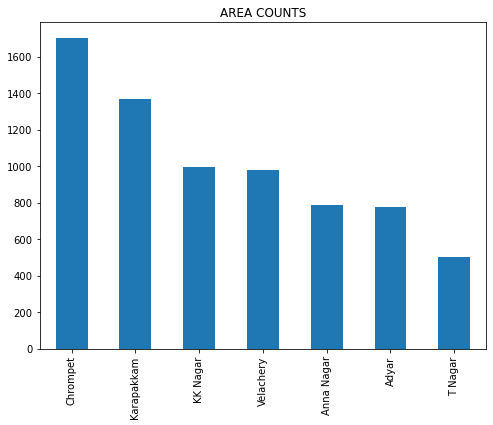

In [25]:
plt.figure(figsize=(8,6));
data['AREA'].value_counts().plot(kind='bar');
plt.title('AREA COUNTS');

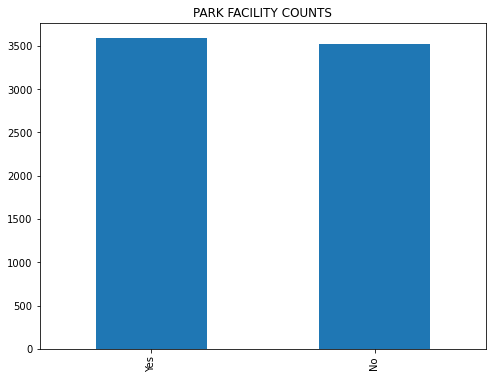

In [26]:
plt.figure(figsize=(8,6));
data['PARK_FACIL'].value_counts().plot(kind='bar');
plt.title('PARK FACILITY COUNTS');

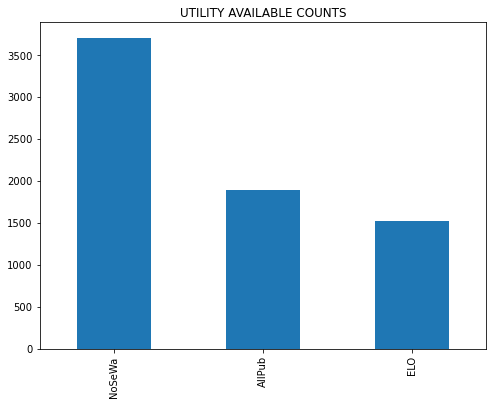

In [27]:
plt.figure(figsize=(8,6));
data['UTILITY_AVAIL'].value_counts().plot(kind='bar');
plt.title('UTILITY AVAILABLE COUNTS');

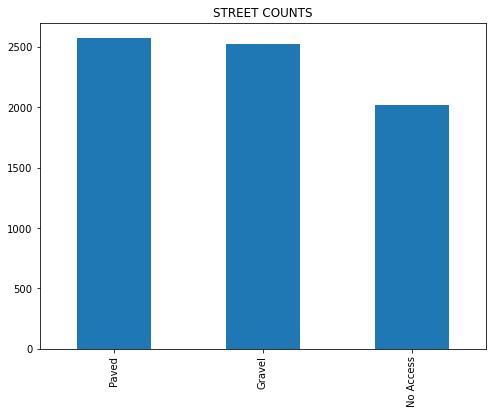

In [28]:
plt.figure(figsize=(8,6));
data['STREET'].value_counts().plot(kind='bar');
plt.title('STREET COUNTS');

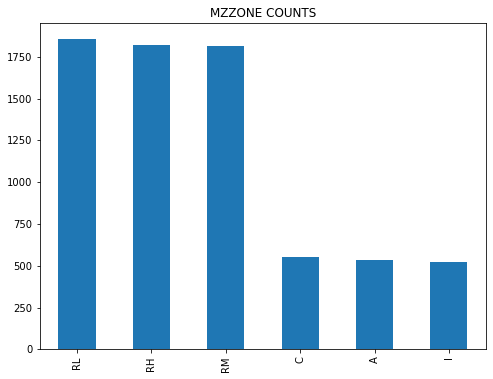

In [29]:
plt.figure(figsize=(8,6));
data['MZZONE'].value_counts().plot(kind='bar');
plt.title('MZZONE COUNTS');

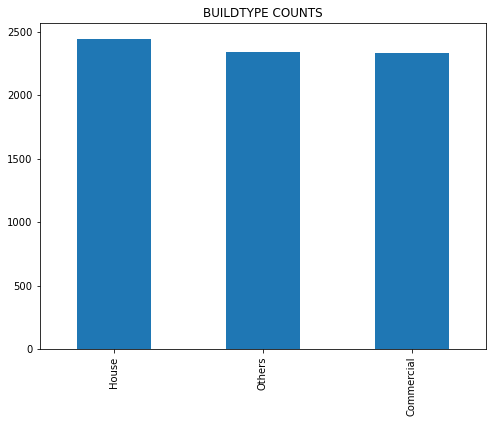

In [30]:
plt.figure(figsize=(8,6));
data['BUILDTYPE'].value_counts().plot(kind='bar');
plt.title('BUILDTYPE COUNTS');

Since PRT_ID is just indexing of houses, I will be dropping it. Also the DATE_SALE and DATE_BUILD is useless to us since we just want a simple regression model and won't doing any time-series stuff and we have used them for calculating AGE.

In [31]:
data['HOUSE_AGE']=pd.to_datetime(data['DATE_SALE'], format='%d-%m-%Y' )-pd.to_datetime(data['DATE_BUILD'], format='%d-%m-%Y')

In [32]:
for index in data.index:
    data.loc[index,'HOUSE_AGE'] = data.loc[index,'HOUSE_AGE'].days

In [33]:
data['HOUSE_AGE'] = data['HOUSE_AGE'].apply(pd.to_numeric)

Also The QS features are masked Data as described in the data description so I am dropping them too.
Finally, The Registration Fee and Commission is determined by the House Sale Price so I am dropping them too as including them will be a form of data leakage!!

In [34]:
data=data.drop(['PRT_ID','DATE_BUILD','DATE_SALE','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL','REG_FEE','COMMIS'], axis=1)

In [35]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,HOUSE_AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,1.089491e+07,8866.486144
std,457.410902,57.403110,0.802881,0.409534,1.019099,3.768603e+06,4504.832249
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.156875e+06,1460.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,8.272100e+06,5110.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,1.033505e+07,8395.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,1.299390e+07,12410.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,2.366734e+07,20075.000000


In [36]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOUSE_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,16060
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,4015
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,7300
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSeWa,Paved,I,9630290,8030
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,10950


In [ ]:
#data.to_csv('Cleaned_data.csv')

# Train Test split & Normalization & pipeline

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [38]:
y=data['SALES_PRICE']
x=data.drop(['SALES_PRICE'], axis=1)

In [40]:
scaler=StandardScaler()

In [39]:
train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.3, random_state=1)

In [43]:
print(train_x.shape)
print(test_x.shape)

(4976, 13)
(2133, 13)


# OnehotEncode using make_column_transformer

In [48]:
column_trans= make_column_transformer((OneHotEncoder(sparse=False), ['AREA','SALE_COND','PARK_FACIL','BUILDTYPE', 'UTILITY_AVAIL','STREET','MZZONE']), remainder='passthrough')

# Linear Regression

In [54]:
dic={}
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)

lr_pipe= make_pipeline(column_trans, scaler, lr)
lr_pipe.fit(train_x,train_y)

y_pred_lr=lr_pipe.predict(test_x)
r2=r2_score(test_y, y_pred_lr)
mae=mean_absolute_error(test_y, y_pred_lr) 
mape=mean_absolute_percentage_error(test_y, y_pred_lr)

dic['Linear Regression']=[r2,mae,mape]
print(r2)
print(mae)
print(mape)


0.9578099515473382
585635.8337934386
0.058613548693407735


# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

dt_pipe= make_pipeline(column_trans, scaler, dt)
dt_pipe.fit(train_x,train_y)

y_pred_dt=dt_pipe.predict(test_x)
r2=r2_score(test_y, y_pred_dt)
mae=mean_absolute_error(test_y, y_pred_dt) 
mape=mean_absolute_percentage_error(test_y, y_pred_dt)

dic['Decision Tree']=[r2,mae,mape]
print(r2)
print(mae)
print(mape)


0.9668230128029169
534839.4374120956
0.05462865512031044


# RandomForest 

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=25, max_features=6, n_estimators=150)

rf_pipe= make_pipeline(column_trans, scaler, rf)
rf_pipe.fit(train_x,train_y)

y_pred_rf=rf_pipe.predict(test_x)
r2=r2_score(test_y, y_pred_rf)
mae=mean_absolute_error(test_y, y_pred_rf) 
mape=mean_absolute_percentage_error(test_y, y_pred_rf)

dic['Random Forest']=[r2,mae,mape]
print(r2)
print(mae)
print(mape)

0.983722850480388
373878.53326003323
0.03949318220293809


# Adaboosting

In [60]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear')

ab_pipe= make_pipeline(column_trans, scaler, ab)
ab_pipe.fit(train_x,train_y)

y_pred_ab=ab_pipe.predict(test_x)
r2=r2_score(test_y, y_pred_ab)
mae=mean_absolute_error(test_y, y_pred_ab) 
mape=mean_absolute_percentage_error(test_y, y_pred_ab)

dic['Adaboosting']=[r2,mae,mape]
print(r2)
print(mae)
print(mape)

0.8996329155939549
967810.8428422922
0.10450110072095885


In [61]:
result=pd.DataFrame(dic, index=['R2', 'MAPE','MAE'])
result

,Linear Regression,Decision Tree,Random Forest,Adaboosting
R2,0.957810,0.966823,0.983723,0.899633
MAPE,585635.833793,534839.437412,373878.533260,967810.842842
MAE,0.058614,0.054629,0.039493,0.104501


RandomForest turned out to be the best model with an accuracy of 98.5%.

# Saving the Model

In [62]:
file='Model_Pipe.sav'
joblib.dump(rf_pipe,open(file,'wb'))

# Loading the model

In [ ]:
# loaded_model = joblib.load(file)
# result = loaded_model.score(test_x, test_y)
# print(result)